# Insightly - The Recurrent Neural Network Implementation
## Analysis and Visualization

### Author: Ronald Li

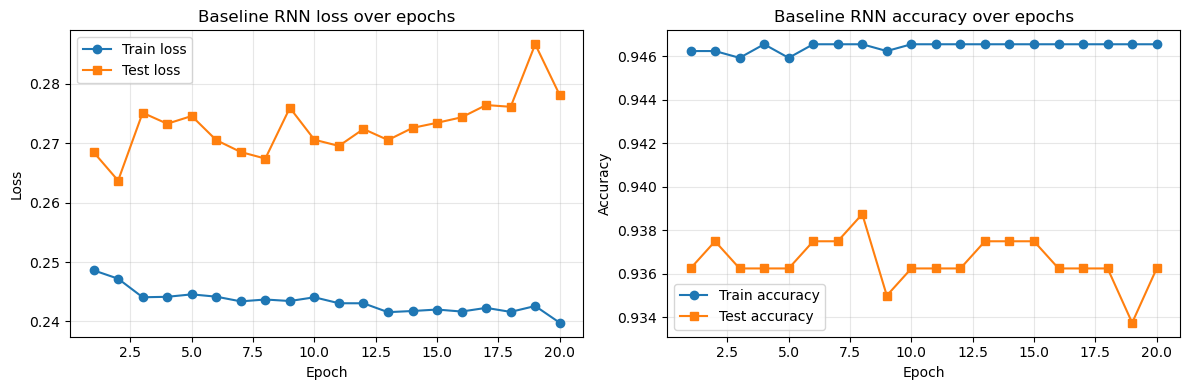

Final epoch metrics:
  Train loss: 0.2398, accuracy: 0.9466
  Test loss:  0.2781, accuracy: 0.9363


In [1]:
# Load training history and plot loss/accuracy curves
import os
import numpy as np
import matplotlib.pyplot as plt

base_dir = "ecommerce_dataset"
history_path = os.path.join(base_dir, "baseline_history.npz")

history = np.load(history_path)
train_losses = history["train_losses"]
test_losses = history["test_losses"]
train_accuracies = history["train_accuracies"]
test_accuracies = history["test_accuracies"]

epochs = np.arange(1, len(train_losses) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss curves
ax1.plot(epochs, train_losses, marker="o", label="Train loss")
ax1.plot(epochs, test_losses, marker="s", label="Test loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Baseline RNN loss over epochs")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(epochs, train_accuracies, marker="o", label="Train accuracy")
ax2.plot(epochs, test_accuracies, marker="s", label="Test accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Baseline RNN accuracy over epochs")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Final epoch metrics:")
print(f"  Train loss: {train_losses[-1]:.4f}, accuracy: {train_accuracies[-1]:.4f}")
print(f"  Test loss:  {test_losses[-1]:.4f}, accuracy: {test_accuracies[-1]:.4f}")


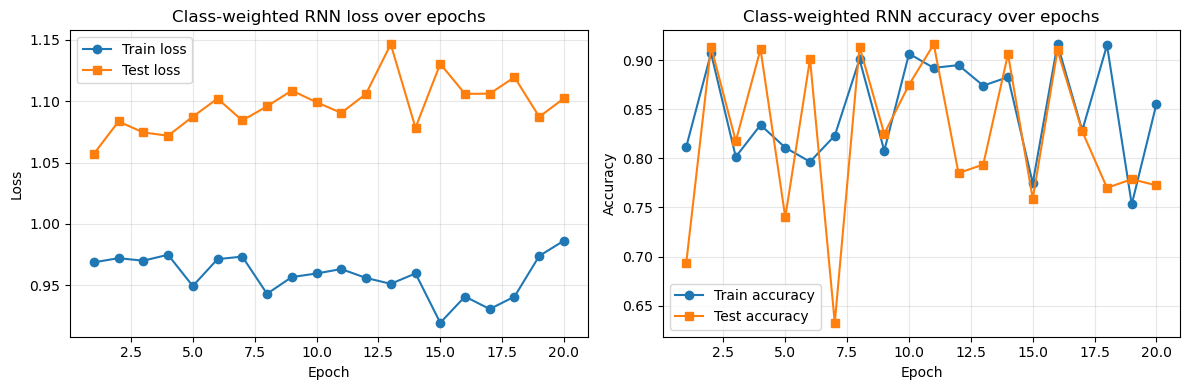

Final epoch metrics (class‑weighted):
  Train loss: 0.9863, accuracy: 0.8556
  Test loss:  1.1024, accuracy: 0.7725


In [3]:
# Load training history and plot loss/accuracy curves for the class‑weighted RNN
base_dir = "ecommerce_dataset"
weighted_history_path = os.path.join(base_dir, "baseline_weighted_history.npz")

weighted_history = np.load(weighted_history_path)
train_losses_w = weighted_history["train_losses"]
test_losses_w = weighted_history["test_losses"]
train_accuracies_w = weighted_history["train_accuracies"]
test_accuracies_w = weighted_history["test_accuracies"]

epochs_w = np.arange(1, len(train_losses_w) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss curves
ax1.plot(epochs_w, train_losses_w, marker="o", label="Train loss")
ax1.plot(epochs_w, test_losses_w, marker="s", label="Test loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Class‑weighted RNN loss over epochs")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy curves
ax2.plot(epochs_w, train_accuracies_w, marker="o", label="Train accuracy")
ax2.plot(epochs_w, test_accuracies_w, marker="s", label="Test accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Class‑weighted RNN accuracy over epochs")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Final epoch metrics (class‑weighted):")
print(f"  Train loss: {train_losses_w[-1]:.4f}, accuracy: {train_accuracies_w[-1]:.4f}")
print(f"  Test loss:  {test_losses_w[-1]:.4f}, accuracy: {test_accuracies_w[-1]:.4f}")

The baseline RNN showed high test accuracy, but this was misleading because about 94% of the reviews are positive. So the model could perform well simply by predicting “Positive” most of the time. In attempt to address this, I trained a class-weighted version of the RNN to penalize mistakes on the minority (Negative/Neutral) classes more heavily. However, the weighted model provided only modest gains and did not meaningfully improve overall performance, reflecting how skewed the data is. On a more balanced dataset, an LSTM variant performed much better, showing that recurrent models can leverage their capacity when the label distribution is healthier. On a highly imbalanced dataset, though, simpler models like Naive Bayes performed better, demonstrating that data balance can matter more than model complexity.